In [1]:
import pandas as pd


import pyreadr

In [3]:
import random
import numpy as np
import torch

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [5]:


# Read the RDS file
result = pyreadr.read_r("D:/Sanjay/Economics/Blinder Oaxaca Project/DF_analysis.rds")

# The RDS file contains a single object, get it like this:
Analysis_df = next(iter(result.values()))

print(Analysis_df.head())


   WKXPNS  INCTOT_MOM  INCTOT_POP  INCTOT_SP  INCWAGE_MOM  INCWAGE_POP  \
0    2065         0.0         0.0    74949.0          0.0          0.0   
1    1589         0.0         0.0    52500.0          0.0          0.0   
2    2065         0.0         0.0    20680.0          0.0          0.0   
3    2065         0.0         0.0        0.0          0.0          0.0   
4    2065         0.0         0.0        0.0          0.0          0.0   

   INCWAGE_SP  INCSS_MOM  INCSS_POP  INCSS_SP  ...  CSLEGAL_3_MISSING  \
0     56000.0        0.0        0.0   74949.0  ...                0.0   
1     52500.0        0.0        0.0   52500.0  ...                0.0   
2         0.0        0.0        0.0   20680.0  ...                0.0   
3         0.0        0.0        0.0       0.0  ...                0.0   
4         0.0        0.0        0.0       0.0  ...                0.0   

   CSLEGAL_4_MISSING  CSLEGAL_6_MISSING  CSLEGAL_98_MISSING  \
0                0.0                0.0              

In [7]:
Analysis_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345762 entries, 0 to 345761
Columns: 1079 entries, WKXPNS to log_INCWAGE
dtypes: float64(45), int32(1034)
memory usage: 1.4 GB


In [9]:
import torch

In [9]:
torch.cuda.is_available()

True

In [31]:
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV

Analysis_df

,WKXPNS,INCTOT_MOM,INCTOT_POP,INCTOT_SP,INCWAGE_MOM,INCWAGE_POP,INCWAGE_SP,INCSS_MOM,INCSS_POP,INCSS_SP,...,CSLEGAL_3_MISSING,CSLEGAL_4_MISSING,CSLEGAL_6_MISSING,CSLEGAL_98_MISSING,CSLEGAL_99_MISSING,CSAGREE_2_MISSING,CSAGREE_3_MISSING,CSAGREE_98_MISSING,CSAGREE_99_MISSING,log_INCWAGE
0,2065,0.0,0.0,74949.0,0.0,0.0,56000.0,0.0,0.0,74949.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.868568
1,1589,0.0,0.0,52500.0,0.0,0.0,52500.0,0.0,0.0,52500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.933107
2,2065,0.0,0.0,20680.0,0.0,0.0,0.0,0.0,0.0,20680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.434116
3,2065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.596635
4,2065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.038840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345757,1737,13000.0,92040.0,0.0,13000.0,75000.0,0.0,0.0,17040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.126631
345758,1737,0.0,0.0,13000.0,0.0,0.0,13000.0,0.0,0.0,13000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.225243
345759,1737,0.0,0.0,92040.0,0.0,0.0,75000.0,0.0,0.0,92040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.472705
345760,1737,0.0,0.0,50601.0,0.0,0.0,50000.0,0.0,0.0,50601.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.289782


In [9]:
DF_female = Analysis_df[Analysis_df['SEX_Female'] == 1]
DF_male = Analysis_df[Analysis_df['SEX_Female'] == 0]



y_m = DF_male['log_INCWAGE'].values
X_m = DF_male.drop(columns=['log_INCWAGE'])

y_f = DF_female['log_INCWAGE'].values
X_f = DF_female.drop(columns=['log_INCWAGE'])
# Split each by train/test
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=1)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=1)


In [11]:
scaler = StandardScaler()
# Male dataset
X_m_train_scaled = pd.DataFrame(scaler.fit_transform(X_m_train), columns=X_m_train.columns, index=X_m_train.index)
X_m_test_scaled = pd.DataFrame(scaler.transform(X_m_test), columns=X_m_test.columns, index=X_m_test.index)

# Female dataset
X_f_train_scaled = pd.DataFrame(scaler.fit_transform(X_f_train), columns=X_f_train.columns, index=X_f_train.index)
X_f_test_scaled = pd.DataFrame(scaler.transform(X_f_test), columns=X_f_test.columns, index=X_f_test.index)

y_m_test = y_m_test.reshape(-1, 1)
y_f_test = y_f_test.reshape(-1, 1)


In [13]:
import xgboost as xgb
dtrainm = xgb.DMatrix(X_m_train_scaled, label=y_m_train)
dtestm = xgb.DMatrix(X_m_test_scaled, label=y_m_test)

In [17]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',   # 👈 USE GPU HERE
    predictor='gpu_predictor', # Optional: use GPU for prediction too
    gpu_id=0,                  # Optional if you have multiple GPUs
    verbosity=1
)

param_grid = {
    'n_estimators': [1000, 2000, 5000, 10000],
    'max_depth': [3, 5, 7, 12],
    'learning_rate': [0.001,0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [10,80,800],
    'reg_alpha': [0]
}




random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=150,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=1   # critical!
)


random_search.fit(X_m_train_scaled, y_m_train)


Fitting 3 folds for each of 150 candidates, totalling 450 fits


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oax

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  50.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:06:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  47.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  46.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:08:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  43.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:09:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  43.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:09:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:09:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:09:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  43.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:09:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:09:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:14:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:19:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:20:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:20:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:24:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:25:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:25:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:26:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:26:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:26:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:27:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:27:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:27:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:29:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:29:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:29:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:38:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 9.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:47:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 9.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:47:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:47:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:56:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 9.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:56:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:56:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:01:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:06:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:06:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:18:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:25:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:31:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:31:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:33:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:34:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:34:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:36:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:36:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:36:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:39:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:42:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:46:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:46:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:47:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:49:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:49:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:49:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:50:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:56:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:56:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:56:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:02:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:08:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:08:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:08:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:16:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:17:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:17:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:21:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:21:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:23:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:26:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:29:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:34:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:36:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:44:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 7.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:44:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:44:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:51:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 7.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:59:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 7.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:00:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  49.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:01:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  49.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  48.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:04:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:04:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:04:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:07:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:10:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:12:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:13:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:18:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:22:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:27:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:27:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:27:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:35:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 8.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:43:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 8.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:43:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:43:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:51:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 8.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:53:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:54:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:54:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:54:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:55:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:02:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:02:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:02:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:08:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:08:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:08:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:14:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:14:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:14:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:21:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:27:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:27:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:27:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:34:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:36:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:36:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:36:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:38:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  59.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:39:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  59.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:39:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:39:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  59.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:43:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:43:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:43:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:46:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:48:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:49:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  39.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:49:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:49:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:50:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  39.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:50:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  39.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:51:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  60.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:52:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:53:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  59.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:53:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:53:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:59:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:59:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:59:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:04:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:04:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:09:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:11:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:12:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:12:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:12:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:13:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:13:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:13:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:14:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:14:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:14:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:16:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:17:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  44.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:18:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:18:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:19:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  43.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:19:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  43.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:21:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:21:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:21:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:22:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:22:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:22:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:24:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:30:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:42:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:42:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:42:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:44:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:47:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:49:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:49:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:49:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  43.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  43.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:51:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  43.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:55:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:59:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:59:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:59:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:02:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:08:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:10:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:10:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:10:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:15:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:15:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:20:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:25:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  28.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:26:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  29.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:26:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  30.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:27:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  38.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:28:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  39.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:28:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  39.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:31:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:31:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:33:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:35:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:35:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:42:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 7.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:42:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:42:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:49:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 7.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:56:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 7.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:02:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:02:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:11:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 5.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:22:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:24:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:24:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:26:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:29:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:33:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:35:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:37:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:38:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:38:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:40:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:40:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  32.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  32.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:41:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  32.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:44:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:44:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:44:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:47:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:50:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:50:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  39.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:51:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  39.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:52:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  39.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:52:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:52:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:54:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:56:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:58:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:59:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  34.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:59:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:59:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:59:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  32.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:59:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:59:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:00:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  33.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:00:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:00:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:02:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:02:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:03:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:12:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 7.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:19:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 7.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:26:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 7.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:31:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:31:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:31:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:36:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:36:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:36:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:43:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:43:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:43:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:47:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:48:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:48:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:52:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:52:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:57:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:57:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:57:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:05:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:13:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:22:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:22:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:29:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 7.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:37:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:45:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 7.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:45:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:45:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:48:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:51:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:51:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:51:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:53:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:53:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:53:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:57:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:57:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:57:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:04:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:04:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:04:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:09:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:09:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:09:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:15:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:20:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:21:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:21:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:26:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:26:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:26:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:32:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:32:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:32:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:37:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:39:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:40:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:40:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:40:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:42:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:42:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:42:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:45:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:50:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:50:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:50:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:55:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:00:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:05:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:05:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:05:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:06:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  40.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:06:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:06:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:07:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  40.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:07:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  39.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:14:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:14:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:14:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:20:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:20:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:20:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:27:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:30:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:34:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:34:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:34:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:37:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:37:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:37:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:46:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:46:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:46:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:50:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:50:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:50:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:56:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:56:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:02:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:02:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:02:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:08:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:08:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:08:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:18:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 9.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:18:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:18:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:27:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 9.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:27:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:27:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:37:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 9.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:37:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:37:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:40:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:40:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:40:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:42:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:42:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:42:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:45:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:45:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:46:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  44.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:46:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  44.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:46:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:46:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  44.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:47:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:47:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:48:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:50:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:50:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:51:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:51:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:51:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:53:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:55:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:55:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:55:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:57:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:57:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:57:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:05:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:05:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:05:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:14:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:14:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:14:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:22:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:22:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:22:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:23:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:23:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:23:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:24:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  60.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:24:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:24:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:25:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  59.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:25:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:25:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:27:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:27:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:27:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:29:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:29:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:29:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:30:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:30:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:30:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:39:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:39:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:39:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:47:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:47:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:47:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:56:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:56:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:56:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:02:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:02:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:02:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:08:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:14:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:14:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:20:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:20:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:20:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:25:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:30:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:31:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:31:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:33:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:33:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:33:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:35:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:37:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:45:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:45:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:53:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:53:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:53:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:01:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:01:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:01:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:05:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:09:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:10:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:10:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:14:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:14:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:14:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:20:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:20:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:20:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:26:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:26:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:26:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:32:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:32:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:32:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:38:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:38:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:38:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:45:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:45:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:45:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:51:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:53:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:53:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:53:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:55:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:55:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:55:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:56:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:57:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  37.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:58:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  37.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:58:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:58:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:58:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  37.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:58:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:58:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:06:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:06:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:14:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:14:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:14:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:22:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:22:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:28:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:28:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:28:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:31:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:31:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:31:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:36:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:36:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:36:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:40:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:44:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:45:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:45:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:46:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:46:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:46:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:47:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:49:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:49:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:54:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:54:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:54:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:59:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:59:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:59:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:04:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:04:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:04:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:09:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:09:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:09:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:14:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:14:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:14:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:18:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:19:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:19:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:19:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  40.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:19:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:19:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:20:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  39.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:20:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:20:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:20:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  39.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:21:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:21:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:21:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  49.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:21:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:21:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:22:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  49.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:22:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:22:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:23:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  50.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:23:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:23:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:28:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:28:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:33:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:33:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:33:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:38:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:38:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:40:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:40:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:40:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:43:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:43:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:43:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:46:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:46:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:46:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  39.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:47:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  39.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:48:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  39.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:51:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:51:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:51:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:54:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:55:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:55:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:58:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:58:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:58:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:01:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:01:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:01:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:05:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:05:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:05:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:08:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:09:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  44.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:09:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:09:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:10:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  44.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:10:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  44.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:10:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:10:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:12:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:12:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:12:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:13:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:14:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:14:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:14:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:15:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:15:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:16:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:19:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:19:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:19:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:21:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:23:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:23:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:23:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:34:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:34:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:40:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:41:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:43:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:44:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:44:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:44:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:45:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:45:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:45:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:46:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:46:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:46:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:47:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:47:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:47:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:53:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:58:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 5.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:04:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:05:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:05:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:05:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:07:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:07:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:07:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:08:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:08:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:08:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:09:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  46.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:09:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:09:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:10:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  46.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:11:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  46.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:11:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:11:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:13:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:15:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:15:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:17:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:17:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:17:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:21:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:21:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:21:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:25:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:26:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:26:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:30:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:31:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:33:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:34:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:34:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  45.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:36:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  46.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:37:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  49.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:37:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:37:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:38:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:38:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:38:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:40:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:41:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:49:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:49:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:49:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:57:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:58:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:58:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:05:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:06:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:06:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:09:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:12:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:15:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:17:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:18:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:19:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  37.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:20:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  37.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:21:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  37.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:21:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:21:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:22:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:22:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:22:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:23:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:24:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:27:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:30:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:30:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:30:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:32:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:32:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:32:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:37:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:37:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:37:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:39:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:42:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:45:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:48:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:48:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:48:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:52:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:55:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:55:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:55:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:56:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:56:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:56:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:57:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  59.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:57:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:57:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:58:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  59.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:58:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:58:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:01:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:05:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:08:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:10:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:11:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:12:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:15:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:15:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:18:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:20:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:20:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:20:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:22:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:23:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:25:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:27:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:28:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:29:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:29:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:30:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:30:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:30:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:31:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  36.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:31:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  35.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:32:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  35.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:32:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  22.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  23.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  23.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:37:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:37:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:37:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:40:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:44:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:45:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:46:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:47:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:48:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  42.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:49:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  42.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:49:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  42.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:51:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:53:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:53:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:53:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:55:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:55:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:55:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:57:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:59:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:00:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:00:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:00:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:05:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:10:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:11:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:11:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:20:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:24:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:24:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:28:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:28:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  29.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:29:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  30.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:29:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  30.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:30:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  53.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:30:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:30:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:31:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  55.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:32:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  54.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:32:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  27.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  27.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:33:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  27.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:36:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:39:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:39:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:39:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:42:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  42.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:42:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:42:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:43:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  42.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:43:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:43:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:43:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  42.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:44:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:44:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:46:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:48:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:50:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:51:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  56.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:52:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  56.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:52:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:52:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:53:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  56.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:53:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  50.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:54:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:54:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:54:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  49.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:54:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:54:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:55:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  50.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:55:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:55:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:56:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  51.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:56:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:56:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:57:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  51.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:57:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:57:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:58:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  51.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBRegressor(...obs=None, ...)"
,param_distributions,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.001, 0.01, ...], 'max_depth': [3, 5, ...], 'n_estimators': [1000, 2000, ...], ...}"
,n_iter,150
,scoring,'neg_root_mean_squared_error'
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [24]:
# 1. Get the best model
best_iteration = model_m.best_iteration

# 2. Predict on the test set
y_pred_test_m = model_m.predict(dtestm, iteration_range=(0, best_iteration + 1))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_log = np.sqrt(mean_squared_error(y_m_test, y_pred_test_m))
mae = mean_absolute_error(y_m_test, y_pred_test_m)
r2 = r2_score(y_m_test, y_pred_test_m)
rmse_norm = np.sqrt(mean_squared_error(np.exp(y_m_test), np.exp(y_pred_test_m)))

print(f"Test RMSE Log: {rmse_log:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test RMSE normal: {rmse_norm:.2f}")

C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:729: UserWarning: [14:16:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  return func(**kwargs)


Test RMSE Log: 0.4985
Test MAE: 0.3709
Test R²: 0.6903
Test RMSE normal: 29915.24


In [26]:
# Predict on training set
y_train_pred_m = model_m.predict(dtrainm, iteration_range=(0, best_iteration + 1))


# RMSE
train_rmse = np.sqrt(mean_squared_error(y_m_train, y_train_pred_m))

# R^2
train_r2 = r2_score(y_m_train, y_train_pred_m)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

Train RMSE: 0.3943
Train R^2: 0.8061


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
scaler_m = scaler.fit(X_m_train)


y_full_male_data_pred = model_m.predict(xgb.DMatrix(pd.DataFrame(scaler_m.transform(X_m), columns=X_m.columns, index=X_m.index)))

# RMSE
rmse_FMD = np.sqrt(mean_squared_error(y_m, y_full_male_data_pred))

# R^2
r2_FMD = r2_score(y_m, y_full_male_data_pred)

print(f"RMSE full male data: {rmse_FMD:.4f}")
print(f"R^2 full male data: {r2_FMD:.4f}")

C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:729: UserWarning: [16:14:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  return func(**kwargs)


RMSE full male data: 0.4144
R^2 full male data: 0.7858


In [25]:
scaler_f = scaler.fit(X_f_train)


y_ffd_p = model_f.predict(xgb.DMatrix(pd.DataFrame(scaler_f.transform(X_f), columns=X_f.columns, index=X_f.index)))

# RMSE
rmse_FfD = np.sqrt(mean_squared_error(y_f, y_ffd_p))

# R^2
r2_FfD = r2_score(y_f, y_ffd_p)

print(f"RMSE full female data: {rmse_FfD:.4f}")
print(f"R^2 full female data: {r2_FfD:.4f}")

C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:729: UserWarning: [16:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  return func(**kwargs)


RMSE full female data: 0.4288
R^2 full female data: 0.7801


Residuals: mean = 0.00022, std = 0.41444, n = 177645


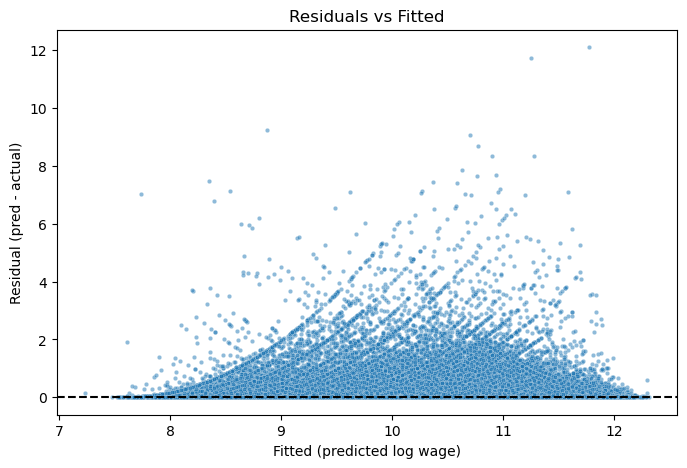

Shapiro-W p = 2.785e-87  (small p => non-normal)
Jarque-Bera p = 0  skew=-0.360 kurt=5.539
Breusch-Pagan: Lagrange multiplier p = 0.0
White test p-value (np.float64(2900.905162530188), np.float64(0.0), np.float64(1474.5064643285718), np.float64(0.0))


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 177645.
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt

resid =  np.asarray(y_m) - np.asarray(y_full_male_data_pred) 
fitted = np.asarray(y_full_male_data_pred)
resid_2 = []

for i in resid:
    resid_2.append(i**2)

    
print("Residuals: mean = %.5f, std = %.5f, n = %d" % (resid.mean(), resid.std(ddof=1), resid.size))

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=resid_2, alpha=0.5, s=10)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Fitted (predicted log wage)")
plt.ylabel("Residual (pred - actual)")
plt.title("Residuals vs Fitted")
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(resid)   # note: Shapiro is sensitive in large samples
jb_stat, jb_p, skew_, kurt_ = jarque_bera(resid)
print("Shapiro-W p = %.4g  (small p => non-normal)" % shapiro_p)
print("Jarque-Bera p = %.4g  skew=%.3f kurt=%.3f" % (jb_p, skew_, kurt_))

# 5) Heteroskedasticity tests (Breusch-Pagan and White)
# Need a regression design matrix for exog: use fitted or some X subset (here use fitted and squared fitted)
exog = sm.add_constant(fitted)   # simple version
bp_test = het_breuschpagan(resid, exog)
white_test = het_white(resid, exog)
print("Breusch-Pagan: Lagrange multiplier p =", bp_test[1])

print(f"White test p-value {white_test}")



In [15]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'learning_rate': 0.05,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'eval_metric': 'rmse',
    
}

model_m = xgb.train(
    params=params,
    dtrain=dtrainm,
    num_boost_round=5000,              # ← reduced from 80000
    evals=[(dtrainm, 'train'), (dtestm, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    verbose_eval=1000                     # ← cleaner logging
)


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:0.87635	test-rmse:0.87662
[1000]	train-rmse:0.47095	test-rmse:0.50737
[2000]	train-rmse:0.44279	test-rmse:0.50153
[3000]	train-rmse:0.41954	test-rmse:0.49943
[4000]	train-rmse:0.39910	test-rmse:0.49863
[4459]	train-rmse:0.39059	test-rmse:0.49857


In [17]:

params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'learning_rate': 0.01,
    'max_depth': 9,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'eval_metric': 'rmse',
    
}


evals_result = {}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=20000,              # ← reduced from 80000
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)

# Despite outperformance I am deciding to stick with my original model there is a very small difference in test MSE but large difference in training MSE indicating some
#degree of overfitting where the additional things learnt seem to have no real impact on out of sample performance
#my intuition for this move is that this is not solely a prediction problem I want to try and estimate the wage structure of men as best as possible and for this I want to avoid fitting noise 

C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [12:35:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [12:35:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:0.89138	test-rmse:0.89498
[667]	train-rmse:0.51129	test-rmse:0.70010


In [65]:
!pip show xgboost


Name: xgboost
Version: 3.0.2
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\users\sanja\.anaconda\envs\oaxaca2\lib\site-packages
Requires: numpy, scipy
Required-by: 


In [38]:
dtrainf = xgb.DMatrix(X_f_train_scaled, label=y_f_train)
dtestf = xgb.DMatrix(X_f_test_scaled, label=y_f_test)

In [39]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',   # 👈 USE GPU HERE
    predictor='gpu_predictor', # Optional: use GPU for prediction too
    gpu_id=0,                  # Optional if you have multiple GPUs
    verbosity=1
)

param_grid = {
    'n_estimators': [1000, 2000, 5000, 10000],
    'max_depth': [3, 5, 7, 12],
    'learning_rate': [0.001,0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [10,80,800],
    'reg_alpha': [0]
}




random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=150,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=1   # critical!
)


random_search.fit(X_f_train_scaled, y_f_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oax

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  48.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:52:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  46.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:53:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  45.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:00:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:06:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:13:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:20:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 7.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:20:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:20:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:28:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 7.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:28:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:28:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:35:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 7.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:40:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:46:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:51:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:54:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:57:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:02:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:04:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  45.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:07:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  44.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:07:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  44.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:09:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:09:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:09:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:10:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:39:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=27.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:05:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=26.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=26.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:36:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:36:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:40:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:44:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:44:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:44:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:45:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  38.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:45:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:45:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:45:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  37.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:46:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  37.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:50:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:55:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:59:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:59:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:59:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:12:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:12:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:19:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=36.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=36.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:52:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=19.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:52:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:52:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:54:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:54:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:56:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:56:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:56:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:58:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:04:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:04:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:04:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:10:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:16:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:16:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:16:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:17:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  44.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:17:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:17:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  41.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:18:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:18:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:18:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  50.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:18:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:18:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:20:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:21:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:32:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 9.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:42:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 9.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:42:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:42:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:51:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 9.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:53:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:53:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:53:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:55:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:55:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:55:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:57:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:57:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:57:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:59:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:59:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:59:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:01:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:02:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:08:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:19:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:32:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=13.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:32:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:32:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:45:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=12.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=13.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:58:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:58:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:41:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=43.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:41:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:41:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:24:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=43.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:24:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:24:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:07:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=42.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:07:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:10:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:10:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:10:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:13:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:13:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:13:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:17:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:17:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:17:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:20:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:20:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:20:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:24:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:24:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:24:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:28:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:29:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  36.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:29:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:29:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:29:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  35.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:29:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:29:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:30:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  35.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:35:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:35:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:35:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:40:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:40:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:40:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:45:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:46:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:46:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:48:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:48:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:48:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:51:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:54:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:54:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:54:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:02:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 8.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:11:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 9.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:12:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:12:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:20:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 8.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:22:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:24:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:26:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:26:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:30:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:30:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:30:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:34:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:34:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:34:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:01:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=23.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:01:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:01:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:25:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=23.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=23.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:48:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:48:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:53:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:53:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:53:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:58:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:58:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:58:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:03:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:03:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:03:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  35.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:03:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:03:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:04:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  34.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:04:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:04:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:04:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  34.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:04:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:04:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:07:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:07:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:07:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:10:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:13:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:13:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:13:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:18:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:18:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:18:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:22:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:22:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:22:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:27:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:27:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:27:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:37:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 9.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:37:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:37:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=10.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:47:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:47:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:56:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 9.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:57:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:57:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:59:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:00:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:00:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:02:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:03:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:03:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:05:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:06:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:06:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:10:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:14:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:14:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:14:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:18:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:18:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:18:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:29:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=11.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:29:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:29:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:41:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=11.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:52:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=11.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:52:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:52:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:53:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:55:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:55:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:55:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:56:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:56:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:02:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:03:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:03:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:09:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:09:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:09:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:15:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:16:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  48.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:17:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  47.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:17:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:17:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:18:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  47.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:18:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:18:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:23:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:23:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:23:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:29:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:29:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:29:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:35:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:35:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:35:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:41:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:41:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:41:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:47:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:47:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:47:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:53:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 5.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:53:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:53:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:10:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=17.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:10:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:10:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=17.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:27:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:27:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:44:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=16.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:44:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:44:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:51:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 7.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:51:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:51:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:59:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 7.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:59:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:59:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:06:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 7.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:07:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:08:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:08:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:08:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:09:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:09:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:09:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:11:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:11:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:11:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:15:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:15:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:15:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:20:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:23:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:23:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:23:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:28:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:33:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:38:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 4.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:38:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:38:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:42:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:42:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:42:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:44:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:44:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:44:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:50:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:50:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:55:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:55:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:55:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:00:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:00:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:12:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:18:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 6.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:20:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:21:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:22:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:23:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:23:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:24:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:24:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:24:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:28:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:28:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:28:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:31:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:34:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:34:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:34:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:36:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:38:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:38:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:38:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  36.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  35.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:42:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  35.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:42:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:42:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:50:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:55:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:55:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  39.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:55:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:56:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  38.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:56:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:56:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:57:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  38.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:57:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:57:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:58:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:58:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:58:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:59:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:00:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:00:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:27:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=27.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:54:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=27.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:54:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:54:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=27.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:34:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=12.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:46:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=12.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:59:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=12.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:02:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:05:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:08:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:13:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:17:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:21:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:26:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:26:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:30:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:30:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:30:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:35:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:41:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 6.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:41:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:41:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:46:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:52:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:52:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:52:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=11.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=11.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:15:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:15:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:26:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=11.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:26:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:26:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:28:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:31:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:33:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:37:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:46:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:47:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:48:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:49:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:49:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [14:49:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [15:33:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=44.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [16:16:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=43.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:16:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [16:16:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:00:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=44.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:01:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:01:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 6.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:07:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:07:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:18:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 5.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:18:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:18:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:29:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=10.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:40:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=10.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:47:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 6.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:47:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:47:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:49:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:50:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:50:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:50:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:52:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  35.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:53:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:53:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:53:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  35.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:54:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  34.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:55:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  50.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:56:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  50.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [17:57:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  50.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:57:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [17:57:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:01:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:06:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:11:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  29.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:12:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  28.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:12:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  26.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:13:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  52.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:14:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  53.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  55.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:15:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:15:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:17:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:20:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:21:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  38.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:22:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  38.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:22:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  37.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:23:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  43.7s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:24:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  44.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:25:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  44.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:25:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:25:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:26:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:28:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:29:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:29:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:29:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:32:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:35:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:39:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:41:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:41:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:43:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:43:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:43:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:46:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:47:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  57.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:47:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  56.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:48:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  55.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:49:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:49:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:53:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:57:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:01:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 4.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:01:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:01:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:03:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:05:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:07:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:07:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:07:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:09:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:13:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:15:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:17:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:17:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:17:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:19:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:22:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:28:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:28:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  50.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:29:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  47.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:30:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  46.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:31:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  41.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:31:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  42.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:32:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  42.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:33:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  26.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:33:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  27.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:33:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=  25.2s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:34:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  33.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:35:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  32.9s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:35:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=  33.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:37:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:40:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:42:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:43:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  54.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:43:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:43:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:44:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  53.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:44:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:44:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [19:45:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=  54.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:45:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [19:45:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:09:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=24.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:32:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=23.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:54:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=22.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [20:59:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:59:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [20:59:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:04:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:04:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:04:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:09:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:09:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:09:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:21:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=12.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:33:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=12.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:46:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=12.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:47:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:49:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:51:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 1.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:51:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:51:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:54:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:54:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:54:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [21:57:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:00:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:00:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:00:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:08:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:08:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:16:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:17:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:17:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 8.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:28:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:28:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:28:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:31:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:34:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:37:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:37:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:40:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:43:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:44:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:44:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:45:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [22:47:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:01:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=14.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:16:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=14.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:16:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:16:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=25.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:41:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:41:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:44:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:47:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:50:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 3.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:51:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:52:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:52:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:52:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [23:54:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:54:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:54:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:00:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:00:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:07:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 6.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:23:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 9.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:32:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 9.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:41:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 9.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:42:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:42:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:44:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:44:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:44:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:47:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:47:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:47:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:50:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:50:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:50:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:54:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:54:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:54:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:58:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:58:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [00:58:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:03:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:03:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:03:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [01:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=29.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:32:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [01:32:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:01:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=29.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:31:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=29.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:31:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:31:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:37:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:37:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:44:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:50:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:50:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:50:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:52:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:52:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:52:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:54:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:54:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:54:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [02:56:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:56:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [02:56:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:00:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:00:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:00:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:04:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:04:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:04:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:08:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 4.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:08:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:08:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:09:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  39.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:09:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:09:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:10:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  38.1s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:10:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:10:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:10:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  38.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:10:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:10:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:17:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 6.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:17:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:17:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:23:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:23:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:23:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [03:30:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:30:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [03:30:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:01:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=31.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:01:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:01:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [04:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=31.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [04:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:04:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=31.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:14:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=10.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:14:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:14:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:24:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=10.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:24:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:24:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:34:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=10.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:35:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:35:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:38:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:38:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:38:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:41:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:41:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [05:44:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:44:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [05:44:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:06:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=21.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:06:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:06:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:27:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=21.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:28:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:28:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:49:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time=21.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:49:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:49:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [06:55:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:55:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [06:55:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:00:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:00:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:05:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 5.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:15:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 9.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:15:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:15:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 9.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:34:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=12, n_estimators=2000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 9.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:34:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:34:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:42:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:42:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:42:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:50:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:51:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:51:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [07:59:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 8.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:59:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [07:59:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:00:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:00:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:00:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:01:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:01:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:01:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:02:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 1.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:02:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:06:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:07:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:07:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:11:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:11:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:11:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 4.4min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:15:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:15:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:31:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=16.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [08:47:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=15.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:03:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=16.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:03:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:03:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:08:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:08:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:08:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:13:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:14:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:14:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:21:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:24:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:24:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:24:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:27:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:30:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:30:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:30:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:33:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:36:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:36:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:38:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:38:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:38:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:40:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:42:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=2000, reg_alpha=0, reg_lambda=10, subsample=1.0; total time= 2.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:42:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:42:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:46:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:46:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:46:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:49:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:49:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:49:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:52:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=5000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time= 3.3min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:52:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:52:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:55:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:55:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:55:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [09:58:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:00:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=0.8; total time= 2.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:01:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:01:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:07:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:07:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:07:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:14:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:14:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:14:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:20:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 6.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:23:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:23:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:23:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:27:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:30:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=5000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:30:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  43.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:31:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  43.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:31:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:32:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=1.0; total time=  42.8s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:32:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:32:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:40:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 8.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:48:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 8.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [10:56:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=12, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 8.2min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:56:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [10:56:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:05:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 9.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:05:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:14:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 9.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:23:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 9.1min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:29:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:35:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 5.9min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:39:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=10000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time= 3.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:41:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:41:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:42:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:43:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:43:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:44:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=2000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [11:52:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 7.7min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:00:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 7.8min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:08:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=5000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time= 8.0min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:23:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=15.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:23:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:23:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:49:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=25.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:14:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=10000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time=25.6min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:15:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  43.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:16:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  38.5s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:17:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=  38.0s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  49.4s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:18:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  49.3s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:19:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=800, subsample=1.0; total time=  49.6s


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:20:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:22:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\core.py:2676: UserWarning: [13:23:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=1000, reg_alpha=0, reg_lambda=80, subsample=0.8; total time= 1.5min


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\training.py:183: UserWarning: [13:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBRegressor(...obs=None, ...)"
,param_distributions,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.001, 0.01, ...], 'max_depth': [3, 5, ...], 'n_estimators': [1000, 2000, ...], ...}"
,n_iter,150
,scoring,'neg_root_mean_squared_error'
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [21]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'learning_rate': 0.01,
    'max_depth': 12,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'eval_metric': 'rmse',
    
    
}

evals_result = {}

bst = xgb.train(
    params=params,
    dtrain=dtrainf,
    num_boost_round=10000,              # ← reduced from 80000
    evals=[(dtrainf, 'train'), (dtestf, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)




C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [13:36:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [13:36:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:0.90972	test-rmse:0.91267
[1000]	train-rmse:0.48387	test-rmse:0.54633
[2000]	train-rmse:0.45346	test-rmse:0.53638
[3000]	train-rmse:0.43258	test-rmse:0.53216
[4000]	train-rmse:0.41511	test-rmse:0.52970
[5000]	train-rmse:0.39969	test-rmse:0.52826
[6000]	train-rmse:0.38543	test-rmse:0.52735
[7000]	train-rmse:0.37177	test-rmse:0.52678
[8000]	train-rmse:0.35936	test-rmse:0.52643
[9000]	train-rmse:0.34728	test-rmse:0.52616
[9527]	train-rmse:0.34106	test-rmse:0.52612


In [32]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'learning_rate': 0.01,
    'max_depth': 12,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 80,
    'reg_alpha': 1,
    'eval_metric': 'rmse',
    
    
}

evals_result = {}

model_f = xgb.train(
    params=params,
    dtrain=dtrainf,
    num_boost_round=20000,              # ← reduced from 80000
    evals=[(dtrainf, 'train'), (dtestf, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)




C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:17:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:17:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:0.91002	test-rmse:0.91290
[1000]	train-rmse:0.51660	test-rmse:0.55023
[2000]	train-rmse:0.49553	test-rmse:0.54014
[3000]	train-rmse:0.48139	test-rmse:0.53575
[4000]	train-rmse:0.46939	test-rmse:0.53318
[5000]	train-rmse:0.45802	test-rmse:0.53163
[6000]	train-rmse:0.44692	test-rmse:0.53063
[7000]	train-rmse:0.43627	test-rmse:0.53006
[8000]	train-rmse:0.42606	test-rmse:0.52970
[9000]	train-rmse:0.41587	test-rmse:0.52954
[9634]	train-rmse:0.40939	test-rmse:0.52950


In [23]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'learning_rate': 0.01,
    'max_depth': 12,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 80,
    'reg_alpha': 1,
    'eval_metric': 'rmse',
    
    
}

evals_result = {}

bst1 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=20000,              # ← reduced from 80000
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)

#This was female mode but training it on male data


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:04:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:04:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:0.89143	test-rmse:0.89178
[1000]	train-rmse:0.49469	test-rmse:0.52188
[2000]	train-rmse:0.47592	test-rmse:0.51257
[3000]	train-rmse:0.46346	test-rmse:0.50848
[4000]	train-rmse:0.45324	test-rmse:0.50608
[5000]	train-rmse:0.44372	test-rmse:0.50448
[6000]	train-rmse:0.43467	test-rmse:0.50329
[7000]	train-rmse:0.42553	test-rmse:0.50249
[8000]	train-rmse:0.41648	test-rmse:0.50200
[9000]	train-rmse:0.40706	test-rmse:0.50172
[10000]	train-rmse:0.39798	test-rmse:0.50153
[11000]	train-rmse:0.38894	test-rmse:0.50146
[11155]	train-rmse:0.38753	test-rmse:0.50147


In [20]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'learning_rate': 0.01,
    'max_depth': 30,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10000,
    'reg_alpha': 1,
    'eval_metric': 'rmse',
    
    
}

evals_result = {}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=50000,              # ← reduced from 80000
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)




C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [13:21:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\xgboost\callback.py:386: UserWarning: [13:21:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:0.91170	test-rmse:0.91454
[1000]	train-rmse:0.55476	test-rmse:0.56791
[2000]	train-rmse:0.53034	test-rmse:0.55038
[3000]	train-rmse:0.51810	test-rmse:0.54432
[4000]	train-rmse:0.50864	test-rmse:0.54091
[5000]	train-rmse:0.50059	test-rmse:0.53879
[6000]	train-rmse:0.49336	test-rmse:0.53735
[7000]	train-rmse:0.48671	test-rmse:0.53630
[8000]	train-rmse:0.48050	test-rmse:0.53554
[9000]	train-rmse:0.47460	test-rmse:0.53494
[10000]	train-rmse:0.46895	test-rmse:0.53447
[11000]	train-rmse:0.46358	test-rmse:0.53409
[12000]	train-rmse:0.45832	test-rmse:0.53379
[13000]	train-rmse:0.45329	test-rmse:0.53356
[14000]	train-rmse:0.44843	test-rmse:0.53335
[15000]	train-rmse:0.44371	test-rmse:0.53319
[16000]	train-rmse:0.43911	test-rmse:0.53304
[17000]	train-rmse:0.43457	test-rmse:0.53295
[18000]	train-rmse:0.43021	test-rmse:0.53289
[19000]	train-rmse:0.42592	test-rmse:0.53282
[20000]	train-rmse:0.42175	test-rmse:0.53277
[20056]	train-rmse:0.42152	test-rmse:0.53277


XGBoostError: bad allocation

In [44]:
# 1. Get the best model
best_iteration = model_f.best_iteration

# 2. Predict on the test set
y_pred_test_f = model_f.predict(dtestf, iteration_range=(0, best_iteration + 1))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_log = np.sqrt(mean_squared_error(y_f_test, y_pred_test_f))
mae = mean_absolute_error(y_f_test, y_pred_test_f)
r2 = r2_score(y_f_test, y_pred_test_f)
rmse_norm = np.sqrt(mean_squared_error(np.exp(y_f_test), np.exp(y_pred_test_f)))

print(f"Test RMSE Log: {rmse_log:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test RMSE normal: {rmse_norm:.2f}")

Test RMSE Log: 0.5295
Test MAE: 0.3901
Test R²: 0.6663
Test RMSE normal: 24447.02


In [48]:
# Predict on training set
y_train_pred_f = model_f.predict(dtrainf, iteration_range=(0, best_iteration + 1))


# RMSE
train_rmse = np.sqrt(mean_squared_error(y_f_train, y_train_pred_f))

# R^2
train_r2 = r2_score(y_f_train, y_train_pred_f)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

Train RMSE: 0.4115
Train R^2: 0.7973


In [37]:


import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
import pickle

explained_diff = []
unexplained_diff = []


param_m = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device' : 'cuda',
    'learning_rate': 0.05,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'eval_metric': 'rmse',

}

param_f = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device': 'cuda',
    'learning_rate': 0.01,
    'max_depth': 12,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 80,
    'reg_alpha': 1,
    'eval_metric': 'rmse',


}



for i in range(30):
    print(i)
    Male_DF_bootstrapped = DF_male.sample(frac = 1, replace = True, random_state = i )
    Female_DF_bootstrapped = DF_female.sample(frac = 1, replace = True, random_state = i)
    X_m_boot = scaler_m.transform(Male_DF_bootstrapped.drop(columns = 'log_INCWAGE'))
    y_m_boot = Male_DF_bootstrapped['log_INCWAGE']
    # Features and target for females
    X_f_boot = scaler_f.transform(Female_DF_bootstrapped.drop(columns='log_INCWAGE'))
    y_f_boot = Female_DF_bootstrapped['log_INCWAGE']

    X_m_train_boot, X_m_val_boot, y_m_train_boot, y_m_val_boot = train_test_split(
    X_m_boot, y_m_boot, test_size=0.2, random_state=i)

    X_f_train_boot, X_f_val_boot, y_f_train_boot, y_f_val_boot = train_test_split(
    X_f_boot, y_f_boot, test_size=0.2, random_state=i)



    # Train male model
    dtrain_m = xgb.DMatrix(X_m_train_boot, label=y_m_train_boot)
    dval_m = xgb.DMatrix(X_m_val_boot, label=y_m_val_boot)
    model_m = xgb.train(dtrain = dtrain_m, params=param_m, num_boost_round=5000, early_stopping_rounds=200, evals =[(dval_m,'val')], verbose_eval=False)

    # Train female model
    dtrain_f = xgb.DMatrix(X_f_train_boot, label=y_f_train_boot)
    dval_f = xgb.DMatrix(X_f_val_boot, label = y_f_val_boot)
    model_f = xgb.train(dtrain = dtrain_f, params=param_f, num_boost_round=20000, early_stopping_rounds=200, evals =[(dval_f,'val')], verbose_eval=False)

    # Predictions
    male_pred_on_male = model_m.predict(dtrain_m)  # fitted male values
    female_pred_on_female = model_f.predict(dtrain_f)  # fitted female values
    male_pred_on_female = model_m.predict(xgb.DMatrix(scaler_m.transform(Female_DF_bootstrapped.drop(columns='log_INCWAGE'))))  # counterfactual
#the adjusted loop is in the collab file
    # Explained: male structure applied to males minus male structure applied to females
    explained = np.mean(male_pred_on_male) - np.mean(male_pred_on_female)

    # Unexplained: male structure applied to females minus female fitted values
    unexplained = np.mean(male_pred_on_female) - np.mean(female_pred_on_female)

    # Store results
    explained_diff.append(explained)
    unexplained_diff.append(unexplained)








In [39]:
print(explained_diff)

[0.44419575, 0.45102692, 0.39715576, 0.5331459, 0.42705822, 0.50211334, 0.37185955, 0.49264622, 0.41800785, 0.4121256, 0.39485455, 0.43870354, 0.3998375, 0.39663792, 0.38418293, 0.4702139, 0.35086155, 0.4271841, 0.37328815, 0.46872234, 0.45208645, 0.40584278, 0.35294342, 0.5894108, 0.40076923, 0.47711086, 0.39707756, 0.40433025, 0.39843082, 0.44255257, 0.43717957, 0.49746895, 0.4740076, 0.3991642, 0.4077072, 0.46165562, 0.43299866, 0.39944267, 0.38124657, 0.40202332, 0.4320135, 0.48254585, 0.49060917, 0.34134483, 0.34993458, 0.3974018, 0.35297108, 0.50350857, 0.37612057]


In [41]:
print(unexplained_diff)

[-0.15725803, -0.16262531, -0.11101723, -0.2464056, -0.13609028, -0.21379566, -0.08102512, -0.2015686, -0.13327312, -0.12072945, -0.11058235, -0.15186405, -0.11124802, -0.11114597, -0.099461555, -0.18416786, -0.06555462, -0.13923264, -0.08037186, -0.18067169, -0.17165089, -0.1178484, -0.057987213, -0.302495, -0.115140915, -0.19401646, -0.105400085, -0.11937523, -0.11687851, -0.15388393, -0.14769554, -0.20730495, -0.18633938, -0.1108408, -0.11719036, -0.17634678, -0.14299297, -0.11234665, -0.0974884, -0.11803436, -0.14074707, -0.19898891, -0.20647526, -0.053764343, -0.06159687, -0.107378006, -0.06718254, -0.22027397, -0.08545208]


In [27]:
explained_diff = [np.float32(0.12093544), np.float32(0.11765957), np.float32(0.11531067), np.float32(0.11963844), np.float32(0.11535263), np.float32(0.12454033), np.float32(0.12167168), np.float32(0.11586666), np.float32(0.11369324), np.float32(0.112210274), np.float32(0.12228489), np.float32(0.10829449), np.float32(0.1196785), np.float32(0.11424255), np.float32(0.12113857), np.float32(0.11684799), np.float32(0.11376858), np.float32(0.116456985), np.float32(0.12017155), np.float32(0.12283707), np.float32(0.113194466), np.float32(0.11577797), np.float32(0.11772728), np.float32(0.12683582), np.float32(0.11649799), np.float32(0.11964512), np.float32(0.117321014), np.float32(0.12506294), np.float32(0.11334705), np.float32(0.11774826)]
unexplained_diff = [np.float32(0.16587925), np.float32(0.16918278), np.float32(0.172719), np.float32(0.16779613), np.float32(0.17121887), np.float32(0.16710663), np.float32(0.16615677), np.float32(0.175457), np.float32(0.17841625), np.float32(0.17255592), np.float32(0.16936016), np.float32(0.17756748), np.float32(0.16544151), np.float32(0.17443848), np.float32(0.16403294), np.float32(0.16888237), np.float32(0.17184353), np.float32(0.1684866), np.float32(0.16794491), np.float32(0.17008877), np.float32(0.17607117), np.float32(0.16510391), np.float32(0.16949272), np.float32(0.16944313), np.float32(0.17020226), np.float32(0.16615868), np.float32(0.16579628), np.float32(0.16648102), np.float32(0.17130184), np.float32(0.1639328)]
# This was generated from running 30 bootstraps with the correct setting due to compute limitations this is how much I am running. nonetheless even with this limited level of bootstrapping my standard errors are extremely low indicating the robustness of the decomposition

print(f"Mean Explained Difference: {np.mean(explained_diff):.4f}")
print(f"Standard Error for Mean Explained Difference: {np.sqrt(np.var(explained_diff)):.4f}")

print(f"Mean Unexplained Difference: {np.mean(unexplained_diff):.4f}")
print(f"Standard Error for Mean Unexplained Difference: {np.sqrt(np.var(unexplained_diff)):.4f}")

Mean Explained Difference: 0.1176
Standard Error for Mean Explained Difference: 0.0039
Mean Unexplained Difference: 0.1699
Standard Error for Mean Unexplained Difference: 0.0038


In [29]:
import numpy as np

estimate = np.mean(explained_diff)
se = np.sqrt(np.var(explained_diff))

t_stat_E = estimate / se

U_estimate = np.mean(unexplained_diff)
se_u = np.sqrt(np.var(unexplained_diff))

t_stat_U = U_estimate/se_u

print(t_stat_E)  # ≈ 8.26
print(t_stat_U)

30.40781
44.842438


In [45]:
from scipy.stats import norm

p_value_U = 2 * (1 - norm.cdf(abs(t_stat_U))) 
p_value_E = 2 * (1 - norm.cdf(abs(t_stat_E)))

print(f"{p_value_U:.5f}")
print(f"{p_value_E:.5f}")

0.00000
0.00000


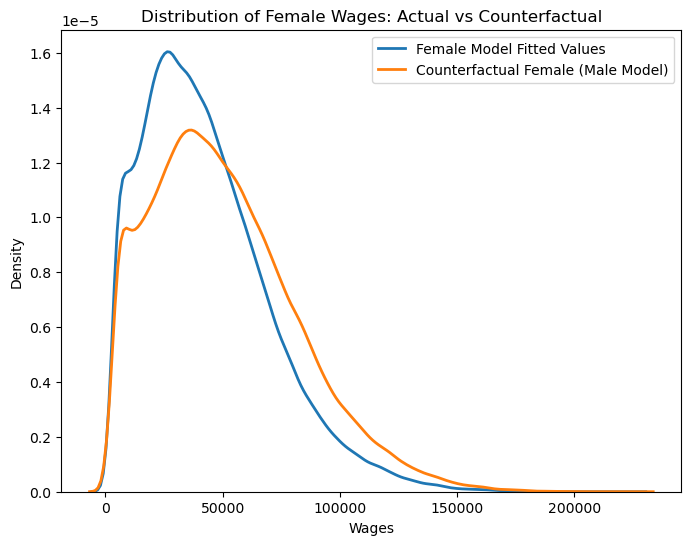

In [50]:
#Let's  dive into unexplained component first
#Actual Female values vs counterfactual distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
scaler_m = StandardScaler().fit(X_m_train)
scaler_f = StandardScaler().fit(X_f_train)

cf_f = np.exp(model_m.predict(xgb.DMatrix(pd.DataFrame(scaler_m.transform(X_f),columns=X_f.columns,index = X_f.index ))))

actual_f = np.exp(model_f.predict(xgb.DMatrix(pd.DataFrame(scaler_f.transform(X_f),columns=X_f.columns,index = X_f.index ))))

plt.figure(figsize=(8,6))
sns.kdeplot(actual_f, label="Female Model Fitted Values", lw=2)
sns.kdeplot(cf_f, label="Counterfactual Female (Male Model)", lw=2)
plt.title("Distribution of Female Wages: Actual vs Counterfactual")
plt.xlabel("Wages")
plt.ylabel("Density")
plt.legend()
plt.show()




In [46]:
gap = np.mean(cf_f) - np.mean(y_f)

print(gap)

50735.25394927842


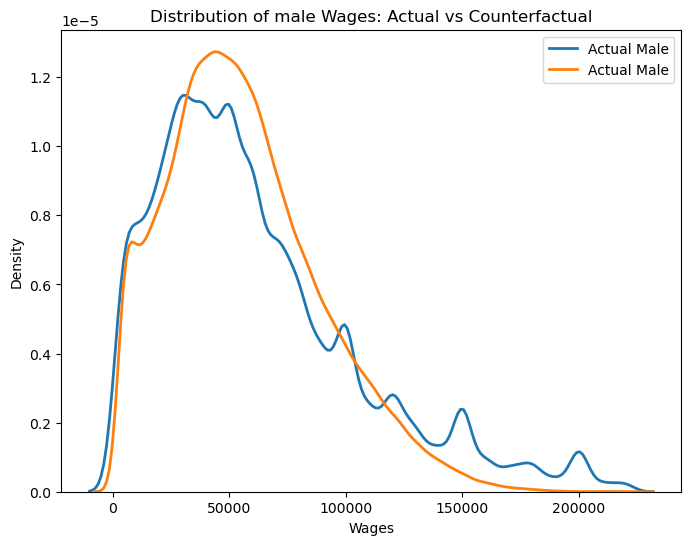

In [70]:
plt.figure(figsize=(8,6))
sns.kdeplot(np.expm1(y_m), label="Actual Male", lw=2)
sns.kdeplot(np.expm1(y_full_male_data_pred), label="Predicted wage according to XGB model", lw=2)
plt.title("Distribution of male Wages: Actual vs Counterfactual")
plt.xlabel("Wages")
plt.ylabel("Density")
plt.legend()
plt.show()

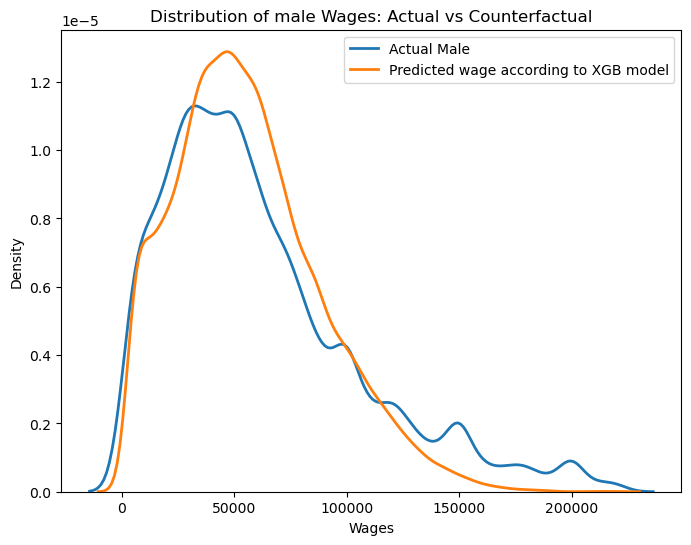

In [74]:
plt.figure(figsize=(8,6))
sns.kdeplot(np.expm1(y_m_test), label="Actual Male", lw=2)
sns.kdeplot(np.expm1(y_pred_test), label="Predicted wage according to XGB model", lw=2)
plt.title("Distribution of male Wages: Actual vs Counterfactual")
plt.xlabel("Wages")
plt.ylabel("Density")
plt.legend()
plt.show()

In [48]:
deciles = np.linspace(0.1, 0.9, 9)
actual_q = np.quantile(actual_f, deciles)
cf_q = np.quantile(cf_f, deciles)
gap = cf_q - actual_q


In [50]:

decile_df = pd.DataFrame({"Decile": deciles, "Actual": actual_q, "Counterfactual": cf_q, "Gap": gap})
print(decile_df)


   Decile        Actual  Counterfactual           Gap
0     0.1  11468.887695    13133.849023   1664.961328
1     0.2  19289.593750    22941.492578   3651.898828
2     0.3  25723.142969    31226.919922   5503.776953
3     0.4  31989.632813    38790.417969   6800.785156
4     0.5  38579.867188    46583.351562   8003.484375
5     0.6  45664.357031    54948.800000   9284.442969
6     0.7  53834.105469    64348.295313  10514.189844
7     0.8  63965.620313    75807.346875  11841.726563
8     0.9  79516.028125    92722.450000  13206.421875


In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- Male model ---
explainer_m = shap.TreeExplainer(model_m)
X_m_scaled = pd.DataFrame(scaler_m.transform(X_m), columns=X_m.columns, index=X_m.index)
shap_m_on_m = explainer_m(X_m_scaled)

# Male model on female data
X_f_scaled = pd.DataFrame(scaler_m.transform(X_f), columns=X_f.columns, index=X_f.index)
shap_m_on_f = explainer_m(X_f_scaled)

# --- Female model ---
explainer_f = shap.TreeExplainer(model_f)
X_f_scaled_f = pd.DataFrame(scaler_f.transform(X_f), columns=X_f.columns, index=X_f.index)
shap_f_on_f = explainer_f(X_f_scaled_f)

# --- Explained (characteristics) ---
# Difference between male & female data under the same model
mean_shap_m = shap_m_on_m.values.mean(axis=0)
mean_shap_f_mmodel = shap_m_on_f.values.mean(axis=0)
explained_gap = mean_shap_f_mmodel - mean_shap_m

# --- Unexplained (returns) ---
# Difference between models on the same (female) data
mean_shap_f_fmodel = shap_f_on_f.values.mean(axis=0)
unexplained_gap = mean_shap_f_mmodel - mean_shap_f_fmodel

# --- Put into dataframes ---
feature_names = X_m.columns  # shared columns
explained_df = pd.DataFrame({
    "Feature": feature_names,
    "Male_mean": mean_shap_m,
    "Female_mean_maleModel": mean_shap_f_mmodel,
    "Explained_Gap": explained_gap
}).sort_values("Explained_Gap", ascending=False)

unexplained_df = pd.DataFrame({
    "Feature": feature_names,
    "MaleModel_on_F": mean_shap_f_mmodel,
    "FemaleModel_on_F": mean_shap_f_fmodel,
    "Unexplained_Gap": unexplained_gap
}).sort_values("Unexplained_Gap", ascending=False)

# --- Visualise unexplained gap ---
topk = 15
plt.figure(figsize=(10,6))
sns.barplot(data=unexplained_df.head(topk), x="Unexplained_Gap", y="Feature", palette="coolwarm")
plt.title("Top Feature-Level Contributions to the Unexplained Wage Gap")
plt.show()


C:\Users\sanja\.anaconda\envs\oaxaca2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
dtrain.save_binary("dtrain.buffer")
dtest.save_binary("dtest.buffer")

dtrainf.save_binary("dtrainf.buffer")
dtestf.save_binary("dtestf.buffer")




In [33]:
# Save
Analysis_df.to_feather('Analysis_df.feather')




In [21]:
import pyreadr
import pandas as pd


train_f_df = pd.DataFrame(X_f_train)
train_f_df['y_f'] = y_f_train

test_f_df = pd.DataFrame(X_f_test)
test_f_df['y_f'] = y_f_test

pyreadr.write_rds("train_f.rds", train_f_df)
pyreadr.write_rds("test_f_df.rds", test_f_df)

In [19]:
pyreadr.write_rds("test_f_df.rds", test_f_df)